In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import cv2
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

2025-04-30 20:51:20.852822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-30 20:51:20.852855: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-30 20:51:20.854177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 20:51:20.861267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 20:51:22.005128: W tensorflow/compiler/tf2

In [3]:
gpu = tf.config.experimental.list_physical_devices('GPU')
for g in gpu:
    tf.config.experimental.set_memory_growth(g, True)
len(gpu) # Check if GPU is available

2025-04-30 20:51:22.922042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-30 20:51:22.960308: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-30 20:51:22.960611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

1

# Reading the Images

glob is a Python module used to find all the file names in a folder that match a specific pattern (like *.jpg for all JPEG images)

    - glob helps you quickly search for files or folders matching a pattern.


In [4]:
normal = glob('/home/yuk/Documents/BigProject/Dataset/Normal/*.png')
tuberculosis = glob('/home/yuk/Documents/BigProject/Dataset/Tuberculosis/*.png')

In [5]:
img_nor = plt.imread(normal[69])
img_tub = cv2.imread(tuberculosis[49])
img_nor.shape , img_tub.shape

((128, 128), (128, 128, 3))

img_nor.shape ---> (512, 512, 3)
img_tub.shape ---> (512, 512, 3)

(Height , Width , Channels)

# Display Images

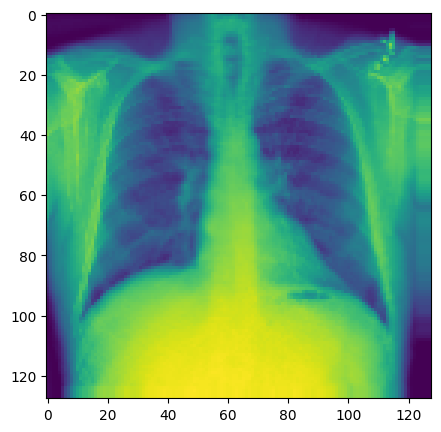

In [6]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(img_nor) # Image of a normal lung without TB  
plt.show()

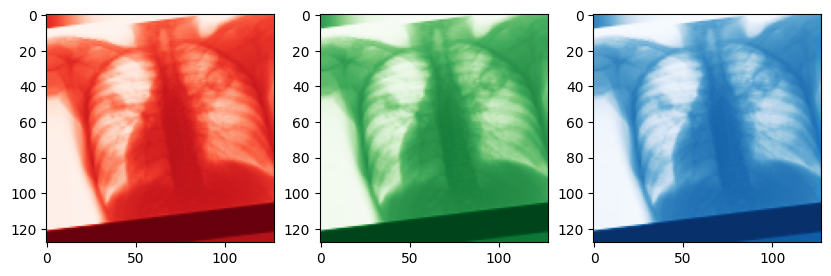

In [7]:
fig, axs = plt.subplots(1 ,3 , figsize=(10, 5))
axs[0].imshow(img_tub[:,:,0], cmap='Reds') 
axs[1].imshow(img_tub[:,:,1], cmap='Greens') 
axs[2].imshow(img_tub[:,:,2], cmap='Blues')
plt.show()  

In [8]:
from skimage import exposure , img_as_float

image1 = img_as_float(img_nor)
image2 = img_as_float(img_tub)

gamma_corrected1 = exposure.adjust_gamma(image1, 0.5)
gamma_corrected2 = exposure.adjust_gamma(image2, 0.5)

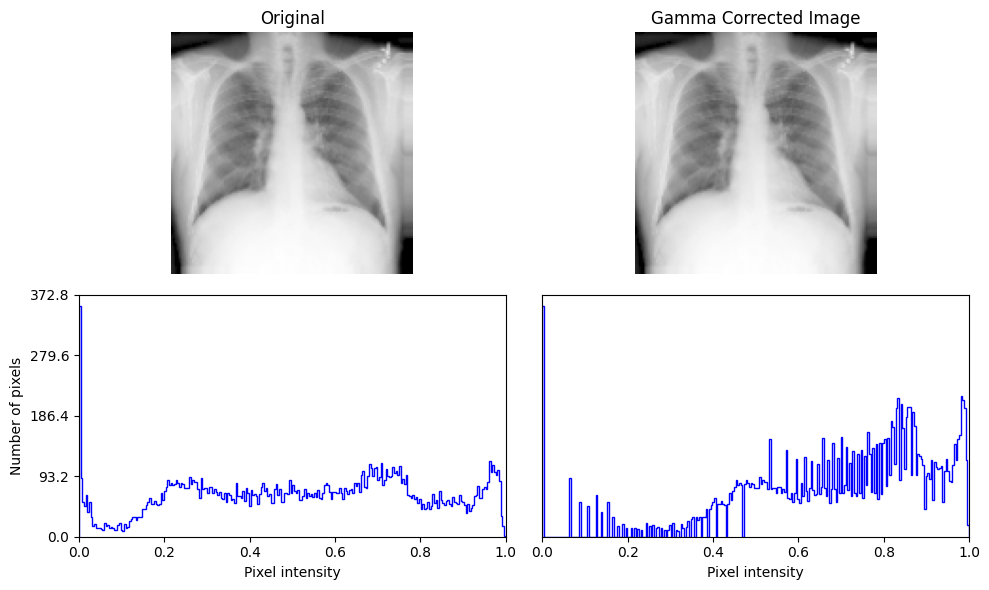

In [9]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image1.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected1.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the normal lung X-ray graph (top image), we can see that the blue line forms three distinct humps or peaks-one small peak at the far left, a medium peak in the middle, and a taller peak on the right. This pattern shows that healthy lungs have a good mix of different brightness levels, representing the natural contrast between air-filled areas (darker) and tissue/bone structures (brighter). After gamma correction, these brightness values spread out into a pattern that looks like a comb with many spikes, but still maintain the overall shape with multiple peaks, showing the lung's normal varied texture.

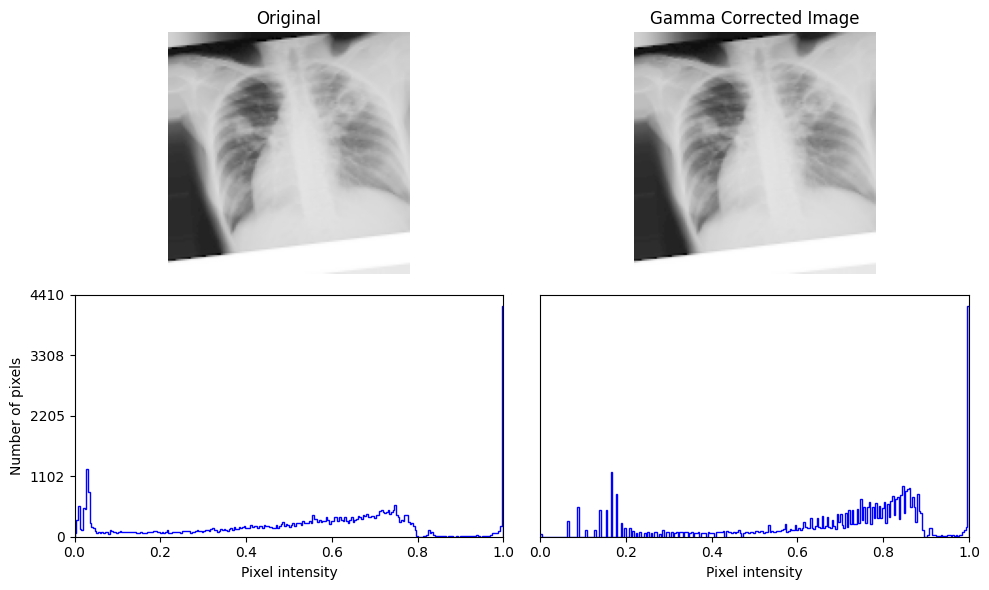

In [10]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image2.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected2.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

# Loading Images with Keras Utilities

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/home/yuk/Documents/BigProject/Dataset',image_size=(128, 128),batch_size=32,color_mode='grayscale')

Found 3898 files belonging to 2 classes.


2025-04-30 20:51:24.422165: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-30 20:51:24.422442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-30 20:51:24.422573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

This turns the TensorFlow dataset data into a NumPy-style iterator, so you can loop through the data and get batches as normal NumPy arrays.

    - We need this because it does not load data directly into the memory , so we just have to use the iterator to convert them into normal numpy array such as ex (x,y)

In [12]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [13]:
batch = data_iterator.next()
# Images represented as a numpy array and labels represented as a numpy array
batch[0].shape , batch[1].shape 

((32, 128, 128, 1), (32,))

class 1 contains TB ,
class 0 Does not contain any TB

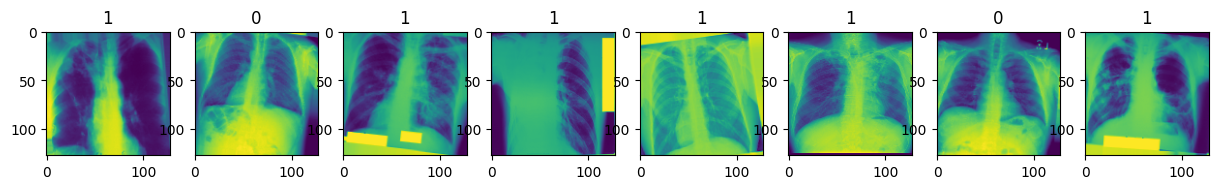

In [14]:
fig , ax = plt.subplots(ncols=8 , figsize=(15,15))
for idx , img in enumerate(batch[0][:8]): # Gets first 8 images
    ax[idx].imshow(img.astype(int))       
    ax[idx].set_title(batch[1][idx]) # Gets the first 8 labels as well

In [15]:
batch[1] # Labels 

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int32)

In [16]:
batch[0].max() # checking the max pixel value

255.0

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

This process improves the contrast in each image, making the details inside the lungs clearer and more visible.

# Normalizing

Adjusting the pixel intensity for better image processing , scaling
the values to [0 , 1]

In [17]:
from tensorflow import keras
tf.config.optimizer.set_jit(True)  

In [18]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
import tf_clahe
from tensorflow.keras import layers

gpu = True

@tf.function(experimental_compile=True)  # Enable XLA
def fast_clahe(img):
    return tf_clahe.clahe(img, gpu_optimized=True)

def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf_clahe.clahe(tf.cast(image, tf.float32))
    image = image / 255.0
    return image, label

data = data.map(preprocess)

In [20]:
for image, label in data.take(1):
    print("Min pixel value:", tf.reduce_min(image).numpy())
    print("Max pixel value:",tf.reduce_max(image).numpy()) 

Min pixel value: 0.0
Max pixel value: 1.0


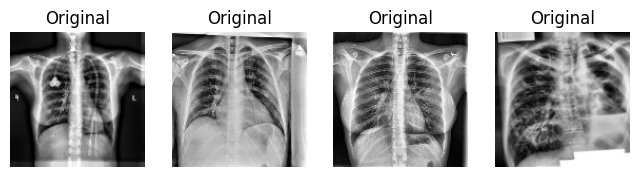

In [21]:
for images, _ in data.take(1):
    plt.figure(figsize=(8, 4))
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')

In [22]:
import tensorflow_addons as tfa

@tf.function(experimental_compile=True)
def image_sharpening(image, label):
    sharpened = tfa.image.sharpness(image, factor=1.5)
    return sharpened, label

data = data.map(image_sharpening)


# Data Augmentation

In [23]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.Resizing(224, 224),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.RandomContrast(0.1),
#     tf.keras.layers.GaussianDropout(0.1),
#     tf.keras.layers.RandomBrightness(0.1), 
#     tf.keras.layers.RandomWidth(0.1),
# ])

# plt.figure(figsize=(10, 7))
# for i in range(9):
#     augmented_image = data_augmentation(batch[0][i])  # Using batch[0] to access images
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_image.numpy().astype("uint8"),cmap='gray')  
#     plt.axis("off")

# CNN Model Training

In [24]:
total_batches = len(data) # ---------> There are 122 , 32 batches 

In [25]:
train_batches = int(total_batches * 0.7)
val_batches = int(total_batches * 0.2)
test_batches = total_batches - train_batches - val_batches

train_data = data.take(train_batches)
val_data = data.skip(train_batches).take(val_batches)
test_data = data.skip(train_batches + val_batches).take(test_batches)

32 → 64 → 128 → 256

In [26]:
from tensorflow.keras import layers, models ,regularizers
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.SpatialDropout2D(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(64 ,activation='relu',kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)))

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.AUC(name='auc'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [28]:
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=5, restore_best_weights=True
# )

In [29]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5
)

In [30]:
trainig = model.fit(
    train_data,
    epochs = 50,
    validation_data = val_data,
    callbacks=[lr_scheduler]
)

Epoch 1/50


2025-04-30 20:51:33.452709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-04-30 20:51:34.087354: I external/local_xla/xla/service/service.cc:168] XLA service 0x74573800bb80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-04-30 20:51:34.087637: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1746026494.211284   31294 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-04-30 20:51:34.213604: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 20:51:34.254095: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority u

85/85 [==============================] - ETA: 0s - loss: 0.9208 - accuracy: 0.7283 - auc: 0.7893 - precision: 0.7151 - recall: 0.7351

W0000 00:00:1746026527.944993   31154 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2025-04-30 20:52:08.562817: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 20:52:08.578991: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 20:52:08.591947: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 20:52:08.629918: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


85/85 [==============================] - 38s 295ms/step - loss: 0.9208 - accuracy: 0.7283 - auc: 0.7893 - precision: 0.7151 - recall: 0.7351 - val_loss: 5.6171 - val_accuracy: 0.5078 - val_auc: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 4.0000e-04
Epoch 2/50
85/85 [==============================] - 28s 328ms/step - loss: 0.6546 - accuracy: 0.8235 - auc: 0.8967 - precision: 0.8181 - recall: 0.8193 - val_loss: 4.0908 - val_accuracy: 0.5026 - val_auc: 0.5275 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 4.0000e-04
Epoch 3/50
85/85 [==============================] - 29s 334ms/step - loss: 0.6173 - accuracy: 0.8268 - auc: 0.9066 - precision: 0.8400 - recall: 0.7962 - val_loss: 2.7149 - val_accuracy: 0.5104 - val_auc: 0.7650 - val_precision: 0.5091 - val_recall: 1.0000 - lr: 4.0000e-04
Epoch 4/50
85/85 [==============================] - 28s 328ms/step - loss: 0.5680 - accuracy: 0.8434 - auc: 0.9262 - precision: 0.8508 - recall: 0.8225 - val_loss: 2.7082 - 

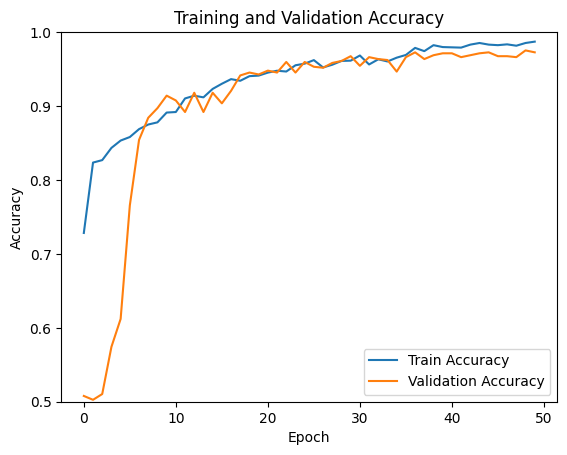

Test accuracy: 0.9756


In [31]:
# Plot training and validation accuracy
plt.plot(trainig.history.get('accuracy', []), label='Train Accuracy')
plt.plot(trainig.history.get('val_accuracy', []), label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test dataset
test_acc = model.evaluate(test_data, verbose=0)[1]
print(f'Test accuracy: {test_acc:.4f}')